# COMS4060A - Introduction of Data Visualisation & Exploration: Assignment 1 

## Group Members
* Lisa Godiwn - 2437980
* Nihal Ranchod - 2427378
* Zach Schwark - 2434346

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

### Question 1: Data Cleaning

In [42]:
df = pd.read_csv('logbook_assignment1.csv')
df_copy = df.copy()
# View initial first few rows
df_copy.head()

C:\Users\nihal\AppData\Local\Temp\ipykernel_26504\3368738525.py:1: DtypeWarning: Columns (3,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('logbook_assignment1.csv')


,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url
0,"Cooling System, Heating System, Lights, Spark ...",Apr 7 2022,"73,370",NaN,NaN,NaN,NaN,NaN,https://www.somewebsite.com/suzuki/swift/2015/...
1,Nov 7 2012,Aug 30 2016,"11,983",12.120,$5.599,$67.86,31.6,NaN,https://www.somewebsite.com/bmw/x3/2009/461150
2,Sep 22 2012,Sep 28 2012,"98,233",7.991,£5.45,£43.53,28.5,NaN,https://www.somewebsite.com/mercedes-benz/e300...
3,May 4 2019,May 4 2019,"163,802",10.575,£5.11,£54.00,46.8,NaN,https://www.somewebsite.com/bmw/320d/2010/247233
4,Feb 15 2022,Feb 15 2022,NaN,11.651,$3.029,$35.29,21.0,244.4,https://www.somewebsite.com/honda/passport/201...


[1.1] Date Fields: 1. Identify what percentage of date_fueled entries that are not proper dates.
* Checking valid date for any order of 'mmm dd yyyy'

In [43]:
from dateutil.parser import parse

# Function to check if a string is a valid date
def is_valid_date(date_str):
    if isinstance(date_str, str) and date_str.strip():
        try:
            parse(date_str, fuzzy=False) # fuzzy paramter ensures that the parsing is strict and does not allow partial matches.
            return True
        except ValueError:
            return False
    return False

# Apply the function to the date_fueled column
df_copy['is_valid_date'] = df_copy['date_fueled'].apply(is_valid_date)

# Calculate the percentage of improper dates
total_entries = len(df_copy)
improper_dates_count = df_copy['is_valid_date'].value_counts().get(False, 0)
percentage_improper_dates = (improper_dates_count / total_entries) * 100

print(f"Total entries: {total_entries}")
print(f"Improper date entries: {improper_dates_count}")
print(f"Percentage of improper dates: {percentage_improper_dates:.2f}%")

C:\Users\nihal\AppData\Roaming\Python\Python310\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname H identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


Total entries: 1174870
Improper date entries: 135126
Percentage of improper dates: 11.50%


[1.1] Date Fields: 2. If date fueled is not entered correctly (or is not a date), and the date
captured is a valid date, then fill in this value as a proxy.

In [44]:
# Function to fill in date_fueled with date_captured if date_fueled is invalid
def fill_invalid_date(row):
    if not is_valid_date(row['date_fueled']):
        if is_valid_date(row['date_captured']):
            return row['date_captured']
    return row['date_fueled']

# Apply the function to the DataFrame
df_copy['date_fueled'] = df_copy.apply(fill_invalid_date, axis=1)

# Apply the function to check if the date_fueled is valid
df_copy['is_valid_date'] = df_copy['date_fueled'].apply(is_valid_date)

# Calculate the percentage of improper dates
total_entries = len(df_copy)
improper_dates_count = df_copy['is_valid_date'].value_counts().get(False, 0)
percentage_improper_dates = (improper_dates_count / total_entries) * 100

# Output the results
print(f"Total entries: {total_entries}")
print(f"Improper date entries: {improper_dates_count}")
print(f"Percentage of improper dates: {percentage_improper_dates:.2f}%")

C:\Users\nihal\AppData\Roaming\Python\Python310\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname H identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "
C:\Users\nihal\AppData\Roaming\Python\Python310\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname H identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


Total entries: 1174870
Improper date entries: 0
Percentage of improper dates: 0.00%


[1.1] Date Fields: 3. Convert the column to a date format, setting any invalid date fueled entries
to NaT.

In [45]:
# Convert the date_fueled and date_captured column to datetime, setting invalid entries to NaT
df_copy['date_fueled'] = pd.to_datetime(df_copy['date_fueled'], errors='coerce')
df_copy['date_captured'] = pd.to_datetime(df_copy['date_captured'], errors='coerce')

df_copy.head()

C:\Users\nihal\AppData\Roaming\Python\Python310\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname H identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url,is_valid_date
0,2022-04-07,2022-04-07,"73,370",NaN,NaN,NaN,NaN,NaN,https://www.somewebsite.com/suzuki/swift/2015/...,True
1,2012-11-07,2016-08-30,"11,983",12.120,$5.599,$67.86,31.6,NaN,https://www.somewebsite.com/bmw/x3/2009/461150,True
2,2012-09-22,2012-09-28,"98,233",7.991,£5.45,£43.53,28.5,NaN,https://www.somewebsite.com/mercedes-benz/e300...,True
3,2019-05-04,2019-05-04,"163,802",10.575,£5.11,£54.00,46.8,NaN,https://www.somewebsite.com/bmw/320d/2010/247233,True
4,2022-02-15,2022-02-15,NaN,11.651,$3.029,$35.29,21.0,244.4,https://www.somewebsite.com/honda/passport/201...,True


[1.1] Date Fields: 4. Remove dates that are in the future, or dates that are earlier than 2005.
- Removing dates for both 'date_fueled' and 'date_captured' in this range:

    * Consistency Across Columns: If one column (date_fueled or date_captured) has a valid date while the other column has an invalid date (in the future or before 2005), it could lead to inconsistencies. For example, analyzing time differences between fueling and capturing, such inconsistencies could distort the results.

    * Simplification: By removing invalid dates from both columns, it simplifies the data cleaning process, ensuring that all remaining records are within the valid date range.

In [46]:
from datetime import datetime

# Define the date range
start_date = datetime(2005, 1, 1)
end_date = datetime.now()

# Filter out dates that are in the future or earlier than 2005
df_copy = df_copy[(df_copy['date_fueled'] >= start_date) & (df_copy['date_fueled'] <= end_date)]
df_copy = df_copy[(df_copy['date_captured'] >= start_date) & (df_copy['date_captured'] <= end_date)]

[1.1] Date Fields: 5. Plot the distribution of fueling dates and comment on the results.

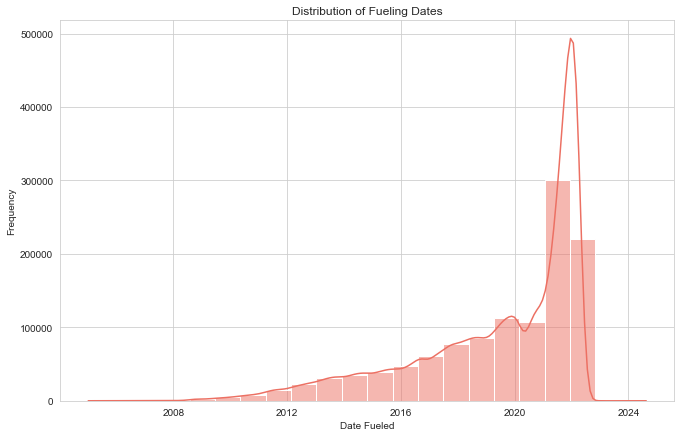

In [47]:
plt.figure(figsize=(11, 7))
sns.set_style('whitegrid')
sns.histplot(df_copy['date_fueled'].dropna(),
                bins='sturges',
                stat='count',
                kde=True,
                color='#ec7063')
plt.title('Distribution of Fueling Dates')
plt.xlabel('Date Fueled')
plt.ylabel('Frequency')
plt.show()


The histogram shows the distribution of valid fueling dates within the specificed range (from 2005 to the current date). 
1. Distribution of Fueling Dates:
    * The data seems to be heavily skewed towards the more recent dates.
    * The KDE line peaks significantly towards the right-hand side of the plot, suggesting that most of the refueling entries occurred within a more condensed recent time period.

2. Historical Refueling Activity:
    * There is a gradual increase in the number of entries over time, with a sharp rise as you approach the more recent dates.
    * This could indicate that the dataset either has more recent entries or that vehicle refueling was recorded more frequently as time progressed.

3. Binning:
    * The histogram bins are wide enough to capture general trends, but there might be clustering towards specific time periods, which the KDE line emphasizes.

[1.2] Numeric Fields: 1. Identify what percentage of gallons, miles, and odometer entries are missing.

In [48]:
# Calculate the percentage of missing values in each of the specified columns
columns = ['gallons', 'miles', 'odometer']
percent_missing = df_copy[columns].isnull().mean() * 100

for column, percentage in percent_missing.items():
    print(f"Percentage of missing entries in '{column}': {percentage:.2f}%")

Percentage of missing entries in 'gallons': 6.33%
Percentage of missing entries in 'miles': 87.60%
Percentage of missing entries in 'odometer': 12.65%


[1.2] Numeric Fields: 2. The miles, gallons and mpg columns are interdependent. If one is missing, the other two can be used to calculate it.

In [49]:
# Convert odometer, gallons and miles to floats
df_copy['gallons'] = df_copy['gallons'].astype(str)
df_copy['gallons'] = df_copy['gallons'].str.replace(',', '').str.strip()
df_copy['gallons'] = pd.to_numeric(df_copy['gallons'], errors='coerce')

df_copy['miles'] = df_copy['miles'].astype(str)
df_copy['miles'] = df_copy['miles'].str.replace(',', '').str.strip()
df_copy['miles'] = pd.to_numeric(df_copy['miles'], errors='coerce')

df_copy['mpg'] = df_copy['mpg'].astype(str)
df_copy['mpg'] = df_copy['mpg'].str.replace(',', '').str.strip()
df_copy['mpg'] = pd.to_numeric(df_copy['mpg'], errors="coerce")

# Display the first few rows to check the conversion
print(df_copy[['gallons', 'miles', 'mpg']].head())

# Function to calculate missing values
def fill_missing_values(row):
    if pd.isnull(row['miles']) and pd.notnull(row['gallons']) and pd.notnull(row['mpg']):
        row['miles'] = row['gallons'] * row['mpg']
    elif pd.isnull(row['gallons']) and pd.notnull(row['miles']) and pd.notnull(row['mpg']):
        row['gallons'] = row['miles'] / row['mpg']
    elif pd.isnull(row['mpg']) and pd.notnull(row['miles']) and pd.notnull(row['gallons']):
        row['mpg'] = row['miles'] / row['gallons']
    return row

# Apply the function to each row in the DataFrame
df_copy = df_copy.apply(fill_missing_values, axis=1)

# Display the updated DataFrame to check the changes
print(df_copy[['gallons','miles','mpg']])

   gallons  miles   mpg
0      NaN    NaN   NaN
1   12.120    NaN  31.6
2    7.991    NaN  28.5
3   10.575    NaN  46.8
4   11.651  244.4  21.0
         gallons     miles   mpg
0            NaN       NaN   NaN
1         12.120  382.9920  31.6
2          7.991  227.7435  28.5
3         10.575  494.9100  46.8
4         11.651  244.4000  21.0
...          ...       ...   ...
1174865   13.046  335.2822  25.7
1174866   12.637  252.7400  20.0
1174867   10.002  285.0570  28.5
1174868   10.493  382.9945  36.5
1174869   17.350    0.0000   0.0

[1172296 rows x 3 columns]


[1.2] Numeric Fields: 3. The values will be read in as objects (or strings) by Pandas. Convert these values to float (note the point above about commas in the value).

In [50]:
print(df_copy[['odometer', 'cost_per_gallon', 'total_spent']].head())

df_copy['odometer'] = df_copy['odometer'].astype(str)
df_copy['odometer'] = df_copy['odometer'].str.replace(',', '').str.strip()
df_copy['odometer'] = pd.to_numeric(df_copy['odometer'], errors='coerce')

# Function to clean and convert to float
def clean_and_convert(value):
    if pd.isna(value):
        return None
    # Remove commas
    value = value.replace(',', '')
    # Remove currency symbols
    value = re.sub(r'[^\d.]', '', value)
    try:
        return float(value)
    except ValueError:
        return None

# Apply the function to create new float columns
df_copy['cost_per_gallon_float'] = df_copy['cost_per_gallon'].apply(clean_and_convert)
df_copy['total_spent_float'] = df_copy['total_spent'].apply(clean_and_convert)

df_copy.head()

   odometer cost_per_gallon total_spent
0   73,370              NaN         NaN
1   11,983           $5.599      $67.86
2   98,233            £5.45      £43.53
3  163,802            £5.11      £54.00
4       NaN          $3.029      $35.29


,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url,is_valid_date,cost_per_gallon_float,total_spent_float
0,2022-04-07,2022-04-07,73370.0,NaN,NaN,NaN,NaN,NaN,https://www.somewebsite.com/suzuki/swift/2015/...,True,NaN,NaN
1,2012-11-07,2016-08-30,11983.0,12.120,$5.599,$67.86,31.6,382.9920,https://www.somewebsite.com/bmw/x3/2009/461150,True,5.599,67.86
2,2012-09-22,2012-09-28,98233.0,7.991,£5.45,£43.53,28.5,227.7435,https://www.somewebsite.com/mercedes-benz/e300...,True,5.450,43.53
3,2019-05-04,2019-05-04,163802.0,10.575,£5.11,£54.00,46.8,494.9100,https://www.somewebsite.com/bmw/320d/2010/247233,True,5.110,54.00
4,2022-02-15,2022-02-15,NaN,11.651,$3.029,$35.29,21.0,244.4000,https://www.somewebsite.com/honda/passport/201...,True,3.029,35.29


In [51]:
df_copy.dtypes

date_fueled              datetime64[ns]
date_captured            datetime64[ns]
odometer                        float64
gallons                         float64
cost_per_gallon                  object
total_spent                      object
mpg                             float64
miles                           float64
user_url                         object
is_valid_date                      bool
cost_per_gallon_float           float64
total_spent_float               float64
dtype: object

### Question 2: Feature Engineering

[2.1] 1. Create a new column with the currency.

In [52]:
# Define a regular expression pattern to match all characters until the first digit
currency_pattern = r'^([^\d]+)'

# Extract the currency symbols/abbreviations from the cost_per_gallon column
df_copy['currency'] = df_copy['cost_per_gallon'].str.extract(currency_pattern, expand=False).str.strip()

print(df_copy['currency'].value_counts())
df_copy.head()

$      738408
£       86154
€       58443
CA$     46249
R       36043
        ...  
CV$        11
KGS         9
L$          9
IQD         8
YR          4
Name: currency, Length: 121, dtype: int64


,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url,is_valid_date,cost_per_gallon_float,total_spent_float,currency
0,2022-04-07,2022-04-07,73370.0,NaN,NaN,NaN,NaN,NaN,https://www.somewebsite.com/suzuki/swift/2015/...,True,NaN,NaN,NaN
1,2012-11-07,2016-08-30,11983.0,12.120,$5.599,$67.86,31.6,382.9920,https://www.somewebsite.com/bmw/x3/2009/461150,True,5.599,67.86,$
2,2012-09-22,2012-09-28,98233.0,7.991,£5.45,£43.53,28.5,227.7435,https://www.somewebsite.com/mercedes-benz/e300...,True,5.450,43.53,£
3,2019-05-04,2019-05-04,163802.0,10.575,£5.11,£54.00,46.8,494.9100,https://www.somewebsite.com/bmw/320d/2010/247233,True,5.110,54.00,£
4,2022-02-15,2022-02-15,NaN,11.651,$3.029,$35.29,21.0,244.4000,https://www.somewebsite.com/honda/passport/201...,True,3.029,35.29,$


[2.1] 2. Create a new column containing the float value of the total spend and the cost per gallon.

In [53]:
# Calculate the total spend by multiplying the cost per gallon by the number of gallons
df_copy['total_spend'] = df_copy['cost_per_gallon_float'] * df_copy['gallons']

df_copy.head()

,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url,is_valid_date,cost_per_gallon_float,total_spent_float,currency,total_spend
0,2022-04-07,2022-04-07,73370.0,NaN,NaN,NaN,NaN,NaN,https://www.somewebsite.com/suzuki/swift/2015/...,True,NaN,NaN,NaN,NaN
1,2012-11-07,2016-08-30,11983.0,12.120,$5.599,$67.86,31.6,382.9920,https://www.somewebsite.com/bmw/x3/2009/461150,True,5.599,67.86,$,67.859880
2,2012-09-22,2012-09-28,98233.0,7.991,£5.45,£43.53,28.5,227.7435,https://www.somewebsite.com/mercedes-benz/e300...,True,5.450,43.53,£,43.550950
3,2019-05-04,2019-05-04,163802.0,10.575,£5.11,£54.00,46.8,494.9100,https://www.somewebsite.com/bmw/320d/2010/247233,True,5.110,54.00,£,54.038250
4,2022-02-15,2022-02-15,NaN,11.651,$3.029,$35.29,21.0,244.4000,https://www.somewebsite.com/honda/passport/201...,True,3.029,35.29,$,35.290879


[2.1] 3. Car make, model, year, User ID: use the url (the last value in the URL is
the user ID).

In [54]:
# Function to extract make, model, year, and user ID
def extract_car_details(url):
    # Remove 'https://www.somewebsite.com/' and split by '/'
    parts = url.replace('https://www.somewebsite.com/', '').split('/')
    
    # Initialize extracted values
    make = parts[0] if len(parts) > 0 else None
    model = parts[1] if len(parts) > 1 else None
    year = parts[2] if len(parts) > 2 else None
    user_id = parts[3] if len(parts) > 3 else None
    
    return pd.Series([make, model, year, user_id])

# Apply the function to extract details and add new columns to the DataFrame
df_copy[['make', 'model', 'year', 'user_id']] = df_copy['user_url'].apply(extract_car_details)
df_copy.head()

,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url,is_valid_date,cost_per_gallon_float,total_spent_float,currency,total_spend,make,model,year,user_id
0,2022-04-07,2022-04-07,73370.0,NaN,NaN,NaN,NaN,NaN,https://www.somewebsite.com/suzuki/swift/2015/...,True,NaN,NaN,NaN,NaN,suzuki,swift,2015,674857
1,2012-11-07,2016-08-30,11983.0,12.120,$5.599,$67.86,31.6,382.9920,https://www.somewebsite.com/bmw/x3/2009/461150,True,5.599,67.86,$,67.859880,bmw,x3,2009,461150
2,2012-09-22,2012-09-28,98233.0,7.991,£5.45,£43.53,28.5,227.7435,https://www.somewebsite.com/mercedes-benz/e300...,True,5.450,43.53,£,43.550950,mercedes-benz,e300,1998,133501
3,2019-05-04,2019-05-04,163802.0,10.575,£5.11,£54.00,46.8,494.9100,https://www.somewebsite.com/bmw/320d/2010/247233,True,5.110,54.00,£,54.038250,bmw,320d,2010,247233
4,2022-02-15,2022-02-15,NaN,11.651,$3.029,$35.29,21.0,244.4000,https://www.somewebsite.com/honda/passport/201...,True,3.029,35.29,$,35.290879,honda,passport,2019,1038865


[2.2] 1. litres filled: use the gallons - consider whether to use UK or US gallons.

In [55]:
# Function to determine the currency type
def determine_currency_type(currency):
    if '$' == currency:
        return 'US'
    elif '£' == currency:
        return 'UK'
    else:
        return 'Other'

# Apply the function to determine currency type
df_copy['currency_type'] = df_copy['currency'].apply(determine_currency_type)

# Count the occurrences of each currency type
currency_counts = df_copy['currency_type'].value_counts()

# Determine the predominant currency
predominant_currency = 'US' if currency_counts.get('US', 0) > currency_counts.get('UK', 0) else 'UK'

# Conversion factor based on the predominant currency
if predominant_currency == 'US':
    conversion_factor = 3.78541  # US gallon to liters
    print(f'Using US gallon to litre conversion factor: {conversion_factor}')
else:
    conversion_factor = 4.54609  # UK gallon to liters
    print(f'Using UK gallon to litre conversion factor: {conversion_factor}')

# Function to convert gallons to liters
def convert_gallons_to_liters(gallons):
    if pd.isna(gallons):
        return None
    return gallons * conversion_factor

# Apply the conversion to create a new 'liters_filled' column
df_copy['litres_filled'] = df_copy['gallons'].apply(convert_gallons_to_liters)

df_copy.head()


Using US gallon to litre conversion factor: 3.78541


,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url,is_valid_date,cost_per_gallon_float,total_spent_float,currency,total_spend,make,model,year,user_id,currency_type,litres_filled
0,2022-04-07,2022-04-07,73370.0,NaN,NaN,NaN,NaN,NaN,https://www.somewebsite.com/suzuki/swift/2015/...,True,NaN,NaN,NaN,NaN,suzuki,swift,2015,674857,Other,NaN
1,2012-11-07,2016-08-30,11983.0,12.120,$5.599,$67.86,31.6,382.9920,https://www.somewebsite.com/bmw/x3/2009/461150,True,5.599,67.86,$,67.859880,bmw,x3,2009,461150,US,45.879169
2,2012-09-22,2012-09-28,98233.0,7.991,£5.45,£43.53,28.5,227.7435,https://www.somewebsite.com/mercedes-benz/e300...,True,5.450,43.53,£,43.550950,mercedes-benz,e300,1998,133501,UK,30.249211
3,2019-05-04,2019-05-04,163802.0,10.575,£5.11,£54.00,46.8,494.9100,https://www.somewebsite.com/bmw/320d/2010/247233,True,5.110,54.00,£,54.038250,bmw,320d,2010,247233,UK,40.030711
4,2022-02-15,2022-02-15,NaN,11.651,$3.029,$35.29,21.0,244.4000,https://www.somewebsite.com/honda/passport/201...,True,3.029,35.29,$,35.290879,honda,passport,2019,1038865,US,44.103812


[2.2] 2. km driven: use the miles driven to compute this.

In [56]:
# Function to convert miles to kilometers
def miles_to_km(miles):
    if pd.isna(miles):
        return None
    return miles * 1.60934  # Convert miles to kilometers

# Apply the function to create a new 'km_driven' column
df_copy['km_driven'] = df_copy['miles'].apply(miles_to_km)

df_copy.head()

,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url,is_valid_date,...,total_spent_float,currency,total_spend,make,model,year,user_id,currency_type,litres_filled,km_driven
0,2022-04-07,2022-04-07,73370.0,NaN,NaN,NaN,NaN,NaN,https://www.somewebsite.com/suzuki/swift/2015/...,True,...,NaN,NaN,NaN,suzuki,swift,2015,674857,Other,NaN,NaN
1,2012-11-07,2016-08-30,11983.0,12.120,$5.599,$67.86,31.6,382.9920,https://www.somewebsite.com/bmw/x3/2009/461150,True,...,67.86,$,67.859880,bmw,x3,2009,461150,US,45.879169,616.364345
2,2012-09-22,2012-09-28,98233.0,7.991,£5.45,£43.53,28.5,227.7435,https://www.somewebsite.com/mercedes-benz/e300...,True,...,43.53,£,43.550950,mercedes-benz,e300,1998,133501,UK,30.249211,366.516724
3,2019-05-04,2019-05-04,163802.0,10.575,£5.11,£54.00,46.8,494.9100,https://www.somewebsite.com/bmw/320d/2010/247233,True,...,54.00,£,54.038250,bmw,320d,2010,247233,UK,40.030711,796.478459
4,2022-02-15,2022-02-15,NaN,11.651,$3.029,$35.29,21.0,244.4000,https://www.somewebsite.com/honda/passport/201...,True,...,35.29,$,35.290879,honda,passport,2019,1038865,US,44.103812,393.322696


[2.2] 3. litres per 100km: use the two new features to calculate this.

In [57]:
# Function to calculate liters per 100 kilometers
def calculate_liters_per_100km(litres, km):
    if pd.isna(litres) or pd.isna(km) or km == 0:
        return None
    return (litres / km) * 100

# Apply the function to create a new 'liters_per_100km' column
df_copy['litres_per_100km'] = df_copy.apply(lambda row: calculate_liters_per_100km(row['litres_filled'], row['km_driven']), axis=1)

df_copy.head()

,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url,is_valid_date,...,currency,total_spend,make,model,year,user_id,currency_type,litres_filled,km_driven,litres_per_100km
0,2022-04-07,2022-04-07,73370.0,NaN,NaN,NaN,NaN,NaN,https://www.somewebsite.com/suzuki/swift/2015/...,True,...,NaN,NaN,suzuki,swift,2015,674857,Other,NaN,NaN,NaN
1,2012-11-07,2016-08-30,11983.0,12.120,$5.599,$67.86,31.6,382.9920,https://www.somewebsite.com/bmw/x3/2009/461150,True,...,$,67.859880,bmw,x3,2009,461150,US,45.879169,616.364345,7.443514
2,2012-09-22,2012-09-28,98233.0,7.991,£5.45,£43.53,28.5,227.7435,https://www.somewebsite.com/mercedes-benz/e300...,True,...,£,43.550950,mercedes-benz,e300,1998,133501,UK,30.249211,366.516724,8.253160
3,2019-05-04,2019-05-04,163802.0,10.575,£5.11,£54.00,46.8,494.9100,https://www.somewebsite.com/bmw/320d/2010/247233,True,...,£,54.038250,bmw,320d,2010,247233,UK,40.030711,796.478459,5.025963
4,2022-02-15,2022-02-15,NaN,11.651,$3.029,$35.29,21.0,244.4000,https://www.somewebsite.com/honda/passport/201...,True,...,$,35.290879,honda,passport,2019,1038865,US,44.103812,393.322696,11.213137


### Question 4: Fuel Usage

[4.1] Outlier Removal: 1. Identify the top 5 currencies by number of transactions.

In [58]:
currency_counts = df_copy['currency'].value_counts()
top_5_currencies = currency_counts.head(5)

print(f'The top 5 currencies are:\n{top_5_currencies}')

top_currencies = top_5_currencies.index.tolist()
print(f'Top currencies list: {top_currencies}')

The top 5 currencies are:
$      738408
£       86154
€       58443
CA$     46249
R       36043
Name: currency, dtype: int64
Top currencies list: ['$', '£', '€', 'CA$', 'R']


[4.1] Outlier Removal: 2. For each of the top 5 currencies separately, remove outliers by considering
the total spend, litres, cost per litre, gallons, etc.

In [73]:
print(f'Using US gallon to litre conversion factor: {conversion_factor}')

# Create a new column 'cost_per_litre' by dividing the cost per gallon by the conversion factor
df_copy['cost_per_litre'] = df_copy['cost_per_gallon_float'] / conversion_factor

# Filter to only include rows with the top 5 currencies
df_filtered = df_copy[df_copy['currency'].isin(top_currencies)]
df_filtered.head()

Using US gallon to litre conversion factor: 3.78541


,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url,is_valid_date,...,total_spend,make,model,year,user_id,currency_type,litres_filled,km_driven,litres_per_100km,cost_per_litre
1,2012-11-07,2016-08-30,11983.0,12.120,$5.599,$67.86,31.6,382.9920,https://www.somewebsite.com/bmw/x3/2009/461150,True,...,67.859880,bmw,x3,2009,461150,US,45.879169,616.364345,7.443514,1.479100
2,2012-09-22,2012-09-28,98233.0,7.991,£5.45,£43.53,28.5,227.7435,https://www.somewebsite.com/mercedes-benz/e300...,True,...,43.550950,mercedes-benz,e300,1998,133501,UK,30.249211,366.516724,8.253160,1.439738
3,2019-05-04,2019-05-04,163802.0,10.575,£5.11,£54.00,46.8,494.9100,https://www.somewebsite.com/bmw/320d/2010/247233,True,...,54.038250,bmw,320d,2010,247233,UK,40.030711,796.478459,5.025963,1.349920
4,2022-02-15,2022-02-15,NaN,11.651,$3.029,$35.29,21.0,244.4000,https://www.somewebsite.com/honda/passport/201...,True,...,35.290879,honda,passport,2019,1038865,US,44.103812,393.322696,11.213137,0.800178
5,2021-10-23,2021-10-23,147567.0,3.413,$3.739,$12.76,29.0,98.9770,https://www.somewebsite.com/volkswagen/passat/...,True,...,12.761207,volkswagen,passat,2004,445811,US,12.919604,159.287645,8.110864,0.987740


In [74]:
# Function to calculate useful statistics
def calculate_stats(df, currency, columns):
    df_currency = df[df['currency'] == currency].copy()
    stats = df_currency[columns].describe(percentiles=[0.25, 0.5, 0.75])
    
    # Calculate Interquartile Range (IQR)
    iqr = stats.loc['75%'] - stats.loc['25%']
    
    print(f"Statistics for {currency}:")
    print(stats)
    print("\nIQR:")
    print(iqr)
    print("=" * 40)

# Currencies and corresponding columns to analyze
currency_columns_mapping = {
    '$': ['total_spent_float', 'gallons', 'cost_per_gallon_float'],
    'CA$': ['total_spent_float', 'gallons', 'cost_per_gallon_float'],
    '£': ['total_spent_float', 'litres_filled', 'cost_per_litre'],
    '€': ['total_spent_float', 'litres_filled', 'cost_per_litre'],
    'R': ['total_spent_float', 'litres_filled', 'cost_per_litre']
}

# Analyze statistics for each currency
for currency, columns in currency_columns_mapping.items():
    calculate_stats(df_filtered, currency, columns)

Statistics for $:
       total_spent_float        gallons  cost_per_gallon_float
count       7.384080e+05  738408.000000          738408.000000
mean        4.200524e+02      13.355445              40.202362
std         1.113601e+04      82.941343            1047.829208
min         0.000000e+00       0.000000               0.000000
25%         3.000000e+01       9.475000               2.779000
50%         4.103000e+01      12.384000               3.299000
75%         5.575000e+01      15.310000               3.999000
max         2.241144e+06   28380.000000          132489.412000

IQR:
total_spent_float        25.750
gallons                   5.835
cost_per_gallon_float     1.220
dtype: float64
Statistics for CA$:
       total_spent_float       gallons  cost_per_gallon_float
count       46249.000000  46249.000000           46249.000000
mean           66.547695     12.282668               5.635165
std           366.363970     66.856162              22.071043
min             0.000000      

### General Approach:
1. **Total Spend (`total_spent_float`)**: I’ll consider values below Q1 - 1.5*IQR and above Q3 + 1.5*IQR as outliers.
2. **Gallons (`gallons`) / Litres (`litres_filled`)**: Similar to total spend, outliers will be those significantly outside the typical range.
3. **Cost per Gallon / Cost per Litre**: This is crucial, especially for identifying incorrect data (e.g., users mistakenly selecting the wrong currency). Extreme outliers could be excluded based on the IQR approach.

### Suggested Thresholds

#### 1. **USD (`$`)**
- **Total Spend**:
  - Range: `1 to 130` (Based on Q1-1.5*IQR and Q3+1.5*IQR)
  - Reasoning: Q1 = 30, Q3 = 56. The IQR is 25.75. I’ll consider outliers below 1 and above 130.
- **Gallons**:
  - Range: `1 to 30` (Based on Q1-1.5*IQR and Q3+1.5*IQR)
  - Reasoning: Q1 = 9.47, Q3 = 15.31, with an IQR of 5.83. I’ll include a buffer and consider outliers below 1 and above 30.
- **Cost per Gallon**:
  - Range: `1 to 5` (Based on Q1-1.5*IQR and Q3+1.5*IQR)
  - Reasoning: Q1 = 2.78, Q3 = 3.99, with an IQR of 1.22. Extreme values above 5 or below 1 are likely errors.

#### 2. **CAD (`CA$`)**
- **Total Spend**:
  - Range: `1 to 130` (Similar to USD)
  - Reasoning: Q1 = 41.86, Q3 = 72.25. The IQR is 30.39. A conservative range similar to USD is appropriate.
- **Gallons**:
  - Range: `1 to 30` (Similar to USD)
  - Reasoning: Q1 = 8.99, Q3 = 14.36. The IQR is 5.37. Outliers below 1 or above 30 are likely incorrect.
- **Cost per Gallon**:
  - Range: `3 to 7` (Based on Q1-1.5*IQR and Q3+1.5*IQR)
  - Reasoning: Q1 = 4.31, Q3 = 5.55. The IQR is 1.24. Values below 3 or above 7 are suspect.

#### 3. **GBP (`£`)**
- **Total Spend**:
  - Range: `1 to 120` (Based on Q1-1.5*IQR and Q3+1.5*IQR)
  - Reasoning: Q1 = 37.96, Q3 = 67.59, with an IQR of 29.63. I’ll consider values below 1 and above 120 as outliers.
- **Litres Filled**:
  - Range: `1 to 85` (Based on Q1-1.5*IQR and Q3+1.5*IQR)
  - Reasoning: Q1 = 31.26, Q3 = 53.13, with an IQR of 21.87. Outliers below 1 or above 85 are likely incorrect.
- **Cost per Litre**:
  - Range: `0.5 to 2` (Based on Q1-1.5*IQR and Q3+1.5*IQR)
  - Reasoning: Q1 = 1.16, Q3 = 1.36, with an IQR of 0.2. I’ll exclude extreme values below 0.5 or above 2.

#### 4. **Euro (`€`)**
- **Total Spend**:
  - Range: `1 to 125` (Based on Q1-1.5*IQR and Q3+1.5*IQR)
  - Reasoning: Q1 = 38.2, Q3 = 70.22, with an IQR of 32.02. Outliers below 1 or above 125 are likely errors.
- **Litres Filled**:
  - Range: `1 to 85` (Based on Q1-1.5*IQR and Q3+1.5*IQR)
  - Reasoning: Q1 = 29.07, Q3 = 51.0, with an IQR of 21.93. Values below 1 or above 85 are suspect.
- **Cost per Litre**:
  - Range: `0.5 to 2` (Similar to GBP)
  - Reasoning: Q1 = 1.23, Q3 = 1.55, with an IQR of 0.32. Values below 0.5 or above 2 are outliers.

#### 5. **Rand (`R`)**
- **Total Spend**:
  - Range: `100 to 1500` (Based on Q1-1.5*IQR and Q3+1.5*IQR)
  - Reasoning: Q1 = 469.32, Q3 = 902.52, with an IQR of 433.2. Values below 100 or above 1500 are likely incorrect.
- **Litres Filled**:
  - Range: `1 to 90` (Based on Q1-1.5*IQR and Q3+1.5*IQR)
  - Reasoning: Q1 = 33.5, Q3 = 61.0, with an IQR of 27.5. Values below 1 or above 90 are likely errors.
- **Cost per Litre**:
  - Range: `10 to 25` (Based on Q1-1.5*IQR and Q3+1.5*IQR)
  - Reasoning: Q1 = 12.79, Q3 = 16.48, with an IQR of 3.69. Outliers below 10 or above 25 are unrealistic.

In [75]:
# Define outlier thresholds for each currency
currency_thresholds = {
    '$': {
        'total_spent_float': (1, 130),  
        'gallons': (1, 30),             
        'cost_per_gallon_float': (1, 5) 
    },
    '£': {
        'total_spent_float': (1, 120),  
        'litres_filled': (1, 85),       
        'cost_per_litre': (0.5, 2)      
    },
    '€': {
        'total_spent_float': (1, 125),  
        'litres_filled': (1, 85),       
        'cost_per_litre': (0.5, 2)      
    },
    'CA$': {
        'total_spent_float': (1, 130),  
        'gallons': (1, 30),            
        'cost_per_gallon_float': (3, 7) 
    },
    'R': {
        'total_spent_float': (100, 1500),  
        'litres_filled': (1, 90),         
        'cost_per_litre': (10, 25)     
    }
}

# Function to apply currency-specific outlier removal
def remove_outliers_by_currency(df_copy, currency, thresholds):
    df_currency = df_copy[df_copy['currency'] == currency].copy()

    for col, (low,high) in thresholds.items():
        df_currency = df_currency[(df_currency[col] >= low) & (df_currency[col] <= high)]
    
    return df_currency

# Apply outlier removal for each currency
cleaned_dfs = []
for currency, thresholds in currency_thresholds.items():
    cleaned_df = remove_outliers_by_currency(df_filtered, currency, thresholds)
    cleaned_dfs.append(cleaned_df)

# Combine cleaned data back into one DataFrame
df_cleaned = pd.concat(cleaned_dfs, ignore_index=True)

# Check the shape before and after to see how many rows were removed
print(f"Original dataset shape: {df_filtered.shape}")
print(f"Cleaned dataset shape: {df_cleaned.shape}")


Original dataset shape: (965297, 23)
Cleaned dataset shape: (854803, 23)


[4.1] Outlier Removal: 3. How many values have been removed after accounting for outliers?

In [76]:
num_values_removed = df_filtered.shape[0] - df_cleaned.shape[0]
print(f'Number of values removed after accounting for outliers: {num_values_removed}')

Number of values removed after accounting for outliers: 110494
